In [40]:
import pandas as pd
import numpy as np
from WindPy import w
import matplotlib.pyplot as plt
from adjustText import adjust_text
%matplotlib inline

In [2]:
w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2020 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [22]:
DATA_DIR = 'D:/OneDrive/嘉实/资产配置/'
file_name = '行业龙头.xlsx'

In [23]:
df = pd.read_excel('%s/%s'%(DATA_DIR, file_name))

In [34]:
sectors = df[['申万三级行业名称']].drop_duplicates()
sectors.index = range(sectors.size)

# 申万三级行业指数

In [6]:
data = w.wset("sectorconstituent","date=2020-10-20;sectorid=a39901011i000000;field=wind_code,sec_name")

In [12]:
sw_df = pd.DataFrame(data.Data, index=data.Fields)
sw_df = sw_df.T

In [20]:
sw_df['申万三级行业名称'] = [x.rstrip('(申万)') for x in sw_df['sec_name']]

In [21]:
sw_df

,wind_code,sec_name,申万三级行业名称
0,850111.SI,种子生产(申万),种子生产
1,850112.SI,粮食种植(申万),粮食种植
2,850113.SI,其他种植业(申万),其他种植业
3,850121.SI,海洋捕捞(申万),海洋捕捞
4,850122.SI,水产养殖(申万),水产养殖
...,...,...,...
222,857344.SI,线缆部件及其他(申万),线缆部件及其他
223,857411.SI,航天装备Ⅲ(申万),航天装备Ⅲ
224,857421.SI,航空装备Ⅲ(申万),航空装备Ⅲ
225,857431.SI,地面兵装Ⅲ(申万),地面兵装Ⅲ


# 合并行业龙头表

In [35]:
sectors = sectors.join(sw_df.set_index('申万三级行业名称'), on='申万三级行业名称')

In [37]:
data = w.wss(sectors['wind_code'].tolist(), 
             "risk_returnyearly_index,stdevry",
             "startDate=20100101;endDate=20201019;returnType=1;period=2")

In [42]:
sectors['ret'] = data.Data[0]
sectors['vol'] = data.Data[1]

In [43]:
sectors

,申万三级行业名称,wind_code,sec_name,return,std,ret,vol
0,银行Ⅲ,851911.SI,银行Ⅲ(申万),2.563500,23.000680,2.563500,23.000680
1,证券Ⅲ,851931.SI,证券Ⅲ(申万),-0.898031,36.838365,-0.898031,36.838365
2,保险Ⅲ,851941.SI,保险Ⅲ(申万),7.275859,30.089363,7.275859,30.089363
3,房地产开发Ⅲ,851811.SI,房地产开发Ⅲ(申万),1.298589,27.986832,1.298589,27.986832
4,白酒,851231.SI,白酒(申万),20.658939,28.193201,20.658939,28.193201
...,...,...,...,...,...,...,...
73,移动互联网服务,852222.SI,移动互联网服务(申万),5.301687,39.267099,5.301687,39.267099
74,互联网信息服务,852221.SI,互联网信息服务(申万),20.936833,38.992090,20.936833,38.992090
75,影视动漫,852242.SI,影视动漫(申万),2.848618,36.073584,2.848618,36.073584
76,人工景点,852111.SI,人工景点(申万),15.018144,37.840130,15.018144,37.840130


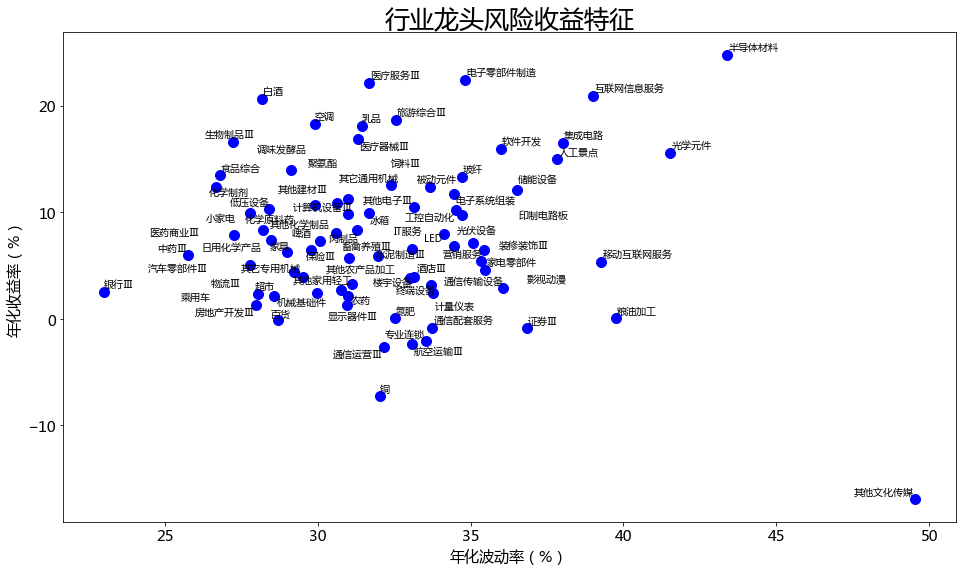

In [50]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.scatter(sectors['vol'], sectors['ret'], color='blue', s=100)

texts = [ax.text(sectors['vol'][i], sectors['ret'][i], sectors['申万三级行业名称'][i], fontsize=10) for i in range(sectors.shape[0])]
adjust_text(texts)

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_ylabel('年化收益率（%）', fontsize=15)
ax.set_xlabel('年化波动率（%）', fontsize=15)
_ = ax.set_title('行业龙头风险收益特征', fontsize=25, y=1)
fig.savefig('../pic/行业龙头风险收益特征.png', format='png', dpi=400, bbox_inches='tight')